# Imports

In [1]:
import sys
import os
sys.path.insert(0,'/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/')
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from reproject import reproject_interp
from scipy.interpolate import interp1d
import copy

from minot.ClusterTools import map_tools
import pitszi

import macsj0717_libs as libs

sigma2fwhm = 2 * np.sqrt(2*np.log(2))

# Parameters

In [2]:
outdir = '/Users/adam/Project/Notes-Papier-Conf/2024_07_PITSZI_MACSJ0717/outputs/'

# Cluster parameters
cl_redshift = 0.546
cl_M500     = 20*1e14*u.Msun
cl_coord    = SkyCoord(109.3806*u.deg, 37.7583*u.deg, frame='icrs')

# Sampling
reso = 4*u.arcsec
FoV  = 4*u.arcmin
los_reso = 30*u.kpc
los_size = 8*u.Mpc

# Analysis parameters
ps_mask_lim = 0.1*100 # mJy
mask_theta = 2*u.arcmin
Nsim = 1000
apply_radial_model = True
clean_ksz = False

# Get the data

In [3]:
#===== Instrument parameters
beam_FWHM    = 18.2*u.arcsec
FoV_diameter = 2*u.arcmin
TF = libs.get_TF()

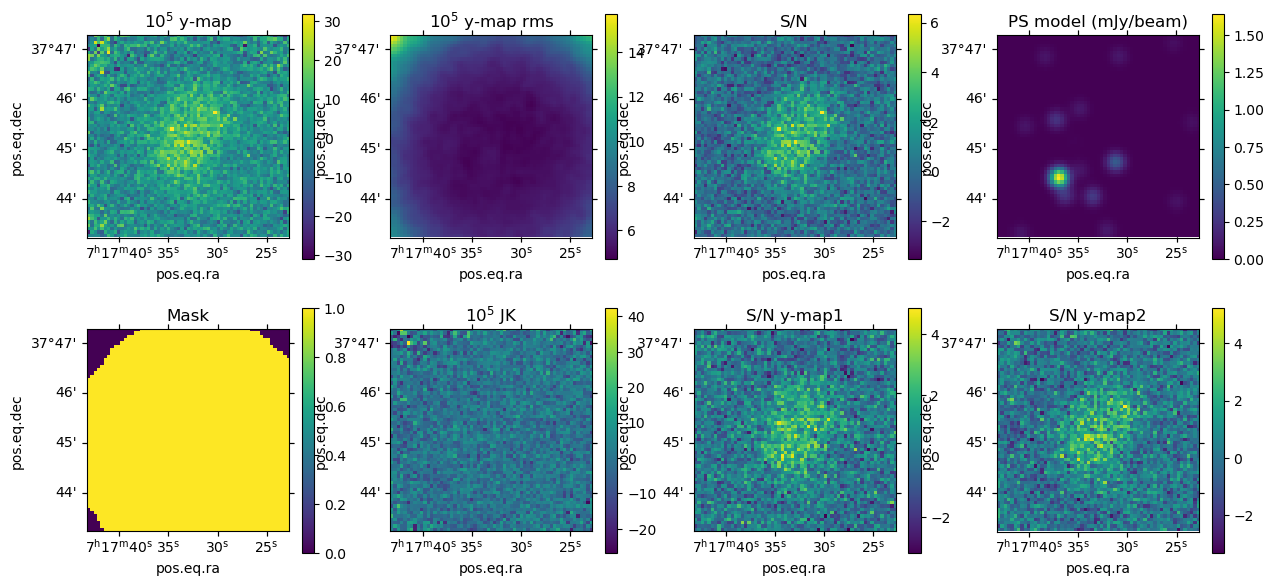

In [4]:
#===== Get the data
cl_head, y2jy, cl_img, cl_img1, cl_img2, cl_jk, cl_ps, cl_rms, cl_noise, cl_mask = libs.extract_data(FoV, reso, 
                                                                                                     ps_mask_lim,
                                                                                                     show=True,
                                                                                                     clean_ksz=clean_ksz)

# Define the model, data and inference

In [5]:
#========== cluster data
cl_data  = libs.def_data(cl_img,  cl_head, cl_noise, cl_mask, beam_FWHM, TF, outdir, Nsim)

In [6]:
#========== cluster model
cl_model = pitszi.Model(name='Model', RA=cl_coord.ra, Dec=cl_coord.dec, 
                        redshift=cl_redshift, M500=cl_M500, 
                        silent=True, output_dir=outdir)
cl_model.set_pressure_profile_universal_param('A10MD')
cl_model.map_header = cl_head
cl_model.los_reso  = los_reso
cl_model.los_size  = los_size
cl_model.R_truncation = 10*u.Mpc

In [7]:
#========== Inference radial
cl_Rinfer1 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit1/')
cl_Rinfer2 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit2/')
cl_Rinfer3 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit3/')
cl_Rinfer4 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit4/')
cl_Rinfer5 = pitszi.InferenceRadial(cl_data, cl_model, method_use_covmat=False, silent=False, output_dir=outdir+'/RadialFit5/')

                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
                    Radial Inference                        
------------------------------------------------------------
                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
                    Radi

# Fit the smooth model to the data

In [8]:
#========== Curvefit the profile case 1
fitpar_prof = libs.def_fitparprof(3)
plist, popt, pcov = cl_Rinfer1.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (M500): 
   median   = 26.480324741843223 -0.9037958963096351 +0.8956093341852842
   best-fit = 26.404147304490902 -0.8276184589573141 +0.9717867715376052
   M500 = 26.480324741843223_{-0.9037958963096351}^{0.8956093341852842}
param 1 (RA): 
   median   = 109.3868797162607 -0.00035596167536766643 +0.00036488200328221865
   best-fit = 109.38650426455673 --1.9490028591917508e-05 +0.0007403337072418026
   RA = 109.3868797162607_{-0.00035596167536766643}^{0.00036488200328221865}
param 2 (Dec): 
   median   = 37.752997380227114 -0.0003515018661417457 +0.0003471188804269332
   best-fit = 37.75343838985892 -0.000792511497948567 +-9.389075137988812e-05
   Dec = 37.752997380227114_{-0.0003515018661417457}^{0.0003471188804269332}
param 3 (min_to_maj_axis_ratio): 
   median   = 0.7825153274631357 -0.02723878424239301 +0.025882124828696007
   best-fit = 0.7714602543415935 -0.01618371112085082 +0.0369371979502382
   min_to_maj_axis_ratio = 0.7825153274631357_{-0.02723878424239301}^{0.025882

In [9]:
#========== Curvefit the profile case 2
fitpar_prof = libs.def_fitparprof(1)
plist, popt, pcov = cl_Rinfer2.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (M500): 
   median   = 18.13577818129575 -0.49281163613821377 +0.5011370138254208
   best-fit = 18.133789199586122 -0.4908226544285874 +0.5031259955350471
   M500 = 18.13577818129575_{-0.49281163613821377}^{0.5011370138254208}
param 1 (ZL): 
   median   = 1.828548341377529e-05 -9.81297422745957e-07 +9.924121436366288e-07
   best-fit = 1.9040389659889798e-05 -1.736203668860465e-06 +2.375058975221208e-07
   ZL = 1.828548341377529e-05_{-9.81297422745957e-07}^{9.924121436366288e-07}


In [10]:
#========== Curvefit the profile case 3
fitpar_prof = libs.def_fitparprof(2)
plist, popt, pcov = cl_Rinfer3.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (M500): 
   median   = 21.658471820870272 -0.5282423432987855 +0.5386500291524214
   best-fit = 21.654756545310903 -0.5245270677394167 +0.5423653047117902
   M500 = 21.658471820870272_{-0.5282423432987855}^{0.5386500291524214}
param 1 (RA): 
   median   = 109.38704855567642 -0.000385572716041338 +0.000400415203515081
   best-fit = 109.38671647527124 -5.3492310868819004e-05 +0.0007324956086876
   RA = 109.38704855567642_{-0.000385572716041338}^{0.000400415203515081}
param 2 (Dec): 
   median   = 37.7529835259007 -0.000316742680396942 +0.00031108569274351794
   best-fit = 37.7531851528932 -0.0005183696728963127 +0.00010945870024414717
   Dec = 37.7529835259007_{-0.000316742680396942}^{0.00031108569274351794}
param 3 (ZL): 
   median   = 1.587862322094625e-05 -1.0108288052376011e-06 +1.0059497831220895e-06
   best-fit = 1.4620296113425578e-05 --2.474983022830722e-07 +2.264276890642763e-06
   ZL = 1.587862322094625e-05_{-1.0108288052376011e-06}^{1.0059497831220895e-06}


In [11]:
#========== Curvefit the profile
fitpar_prof = libs.def_fitparprof(4)
plist, popt, pcov = cl_Rinfer4.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (P_0): 
   median   = 0.11651330759092661 -0.007955010508234536 +0.007973486530500118
   best-fit = 0.11623038538689873 -0.0076720883042066534 +0.008256408734528
   P_0 = 0.11651330759092661_{-0.007955010508234536}^{0.007973486530500118}
param 1 (r_p): 
   median   = 852.7520141011773 -44.23242474740596 +44.421833083621436
   best-fit = 853.4371911054134 -44.917601751641996 +43.7366560793854
   r_p = 852.7520141011773_{-44.23242474740596}^{44.421833083621436}
param 2 (RA): 
   median   = 109.38731474846173 -0.00027864249162234955 +0.00028310959353916587
   best-fit = 109.38760747803309 -0.0005713720629785257 +-9.619977817010295e-06
   RA = 109.38731474846173_{-0.00027864249162234955}^{0.00028310959353916587}
param 3 (Dec): 
   median   = 37.75292374885662 -0.0002729212446013207 +0.00027803014850746877
   best-fit = 37.752679479837006 -2.865222499082165e-05 +0.0005222991681179678
   Dec = 37.75292374885662_{-0.0002729212446013207}^{0.00027803014850746877}
param 4 (min_to_maj_axi

In [12]:
#========== Curvefit the profile
fitpar_prof = libs.def_fitparprof(5)
plist, popt, pcov = cl_Rinfer5.run_curvefit_profile(fitpar_prof, 
                                                    show_fit_result=True, 
                                                    set_bestfit=True)

param 0 (P_0): 
   median   = 0.10103706435239693 -0.012508651860939454 +0.00974662091152663
   best-fit = 0.10394469693330644 -0.015416284441848963 +0.006838988330617121
   P_0 = 0.10103706435239693_{-0.012508651860939454}^{0.00974662091152663}
param 1 (r_p): 
   median   = 426.4752141565192 -34.78848399162371 +28.775094930701812
   best-fit = 463.3193363114386 -71.63260614654308 +-8.069027224217564
   r_p = 426.4752141565192_{-34.78848399162371}^{28.775094930701812}
param 2 (a): 
   median   = 8.545835517042935 -1.4006934468303571 +1.0014613673710127
   best-fit = 6.8892279303047905 --0.25591413990778733 +2.658068954109157
   a = 8.545835517042935_{-1.4006934468303571}^{1.0014613673710127}
param 3 (b): 
   median   = 6.120920661867826 -1.8187971513067884 +1.2811241320874593
   best-fit = 7.3692392678177026 -3.0671157572566647 +0.03280552613758303
   b = 6.120920661867826_{-1.8187971513067884}^{1.2811241320874593}
param 4 (c): 
   median   = 0.12007953459469624 -0.08467804494465278 +0

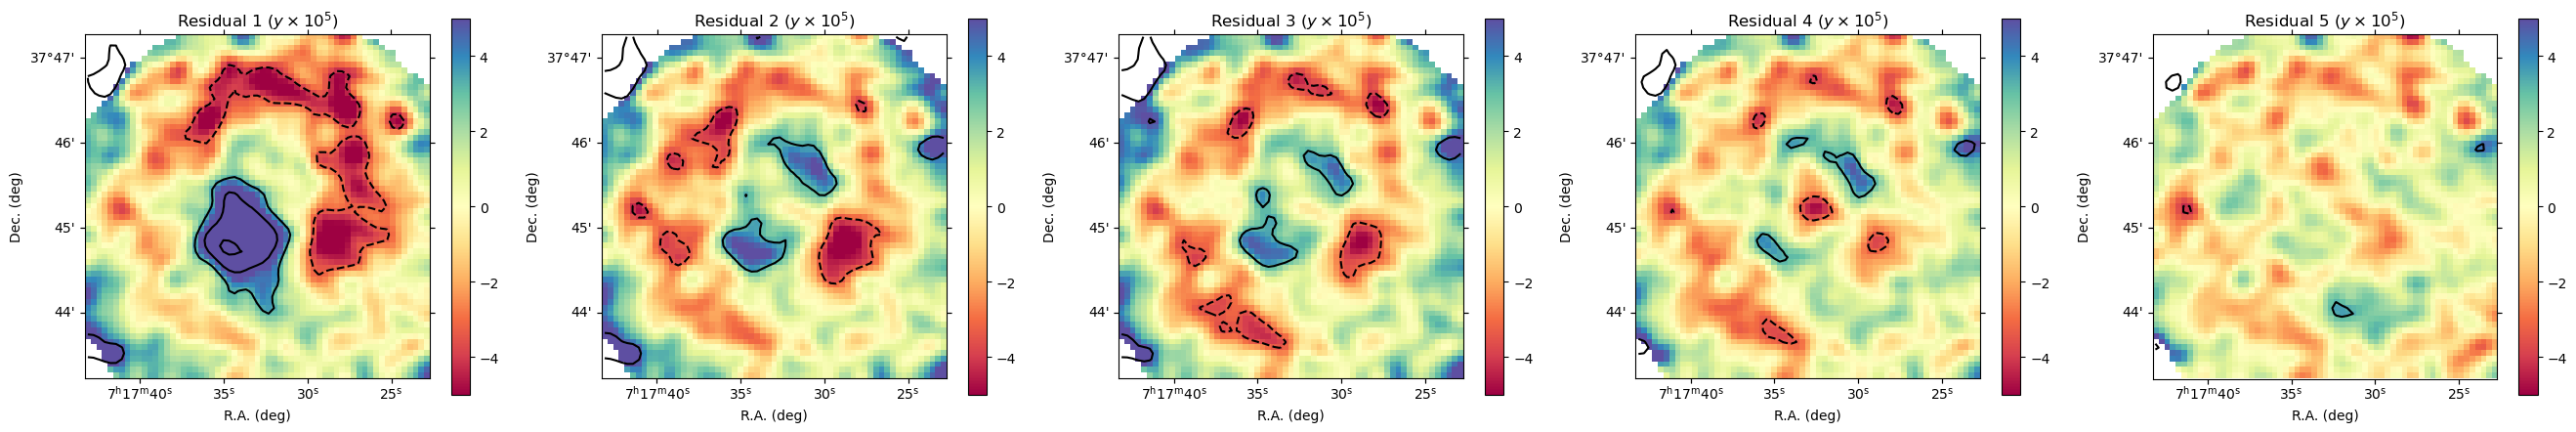

In [13]:
#===== Show the images

smooth_FWHM = 15*u.arcsec

# Show the data
plt.rcParams.update({'font.size': 10})
fig = plt.figure(0, figsize=(33, 5))
model_sph1 = cl_Rinfer1.get_radial_model()
model_sph2 = cl_Rinfer2.get_radial_model()
model_sph3 = cl_Rinfer3.get_radial_model()
model_sph4 = cl_Rinfer4.get_radial_model()
model_sph5 = cl_Rinfer5.get_radial_model()
    
rms = cl_data.get_noise_rms_from_model(Nmc=Nsim, smooth_fwhm=smooth_FWHM)
rms = gaussian_filter(rms, sigma=10/3600/sigma2fwhm/cl_head['CDELT2'])
    
rng = [-5,5]

msk = copy.deepcopy(cl_data.mask)
msk[cl_data.mask == 0] = np.nan
    
#----- Residual 1
ax = plt.subplot(1, 5, 1, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph2, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph2, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 1 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')
    
#----- Cluster model
ax = plt.subplot(1, 5, 2, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph3, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph3, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 2 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')

#----- Residual model
ax = plt.subplot(1, 5, 3, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph1, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph1, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 3 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')

#----- Residual model
ax = plt.subplot(1, 5, 4, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph4, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph4, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 4 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')

#----- Residual model
ax = plt.subplot(1, 5, 5, projection=WCS(cl_head))
plt.imshow(msk*gaussian_filter(cl_img - model_sph5, 
                               sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])*1e5, 
           cmap='Spectral', vmin=rng[0], vmax=rng[1])
cb = plt.colorbar()
plt.contour(gaussian_filter(cl_img - model_sph5, 
                            sigma=smooth_FWHM.to_value('deg')/sigma2fwhm/cl_head['CDELT2'])/rms, 
            levels=[-6,-3,3,6,9,12,15,18,21], colors='k')
plt.title(r'Residual 5 ($y \times 10^5$)')
plt.xlabel('R.A. (deg)')
plt.ylabel('Dec. (deg)')

plt.savefig(outdir+'/RadialFit_residuals.pdf')